In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tifffile as tiff 

from skimage import io, color, filters
from skimage.transform import rescale, resize, downscale_local_mean

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing

/gdrive/My Drive/Colab Notebooks/_Image Processing


In [20]:
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()
camera = data.camera()
rocket = data.rocket()

In [11]:
coffee_image.shape # geometry of the image with 3 RGB channels 

(400, 600, 3)

In [48]:
coins_image.shape # geometry of the image- Gray 

(303, 384)

In [49]:
camera.shape # Gray 

(512, 512)

In [13]:
coffee_image.size # the number of pixels

720000

In [16]:
# Retrieving statistical information about image intensity values
coffee_image.max(), coffee_image.min(), coffee_image.mean()

(255, 0, 98.61595416666667)

In [18]:
'''
Two-dimensional (2D) grayscale images (such as camera above) are indexed by rows and columns (abbreviated to either (row, col) or (r, c)), 
with the lowest element (0, 0) at the top-left corner.
'''
coins_image.shape # no RGB channels ..just a Gray Image



(303, 384)

In [ ]:
# Image Data Types 
# https://scikit-image.org/docs/dev/user_guide/data_types.html#data-types



In [17]:
# Get the value of the pixel at the 10th row and 20th column
coffee_image[10,20]

array([30, 20, 11], dtype=uint8)

In [19]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

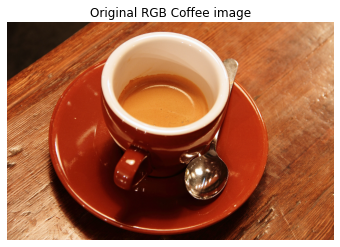

In [27]:
show_image(coffee_image, 'Original RGB Coffee image');

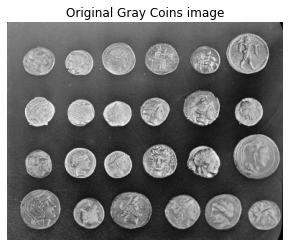

In [26]:
show_image(coins_image, 'Original Gray Coins image');

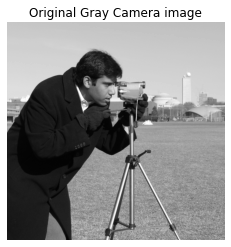

In [28]:
show_image(camera, 'Original Gray Camera image');

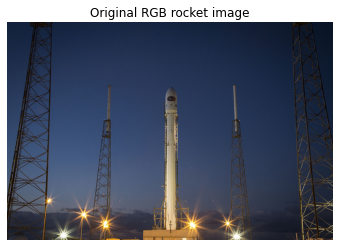

In [30]:
show_image(rocket, 'Original RGB rocket image');

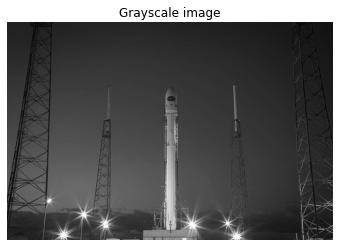

In [31]:
from skimage import data, color

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

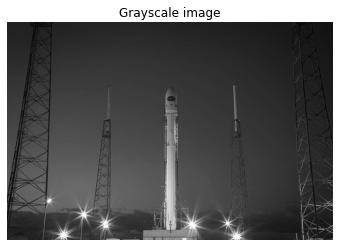

In [41]:
# Indexing NumPy

# Get the value of the pixel at the 10th row and 20th column
# Gray Image
camera[10, 20]


# R, G, B channels 
# Get the value of the pixel at the 10th row and 20th column
rocket[10, 20,0], rocket[10, 20,1], rocket[10, 20,2] 

(20, 36, 62)

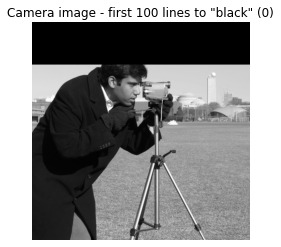

In [45]:
# Slicing  
# Set the first 100 lines to "black" (0)
camera[:100] = 0
show_image(camera, 'Camera image - first 100 lines to "black" (0)');

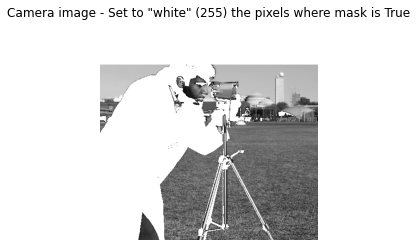

In [46]:
# Masking 
mask = camera < 87

# Set to "white" (255) the pixels where mask is True
camera[mask] = 255
show_image(camera, 'Camera image - Set to "white" (255) the pixels where mask is True');

In [47]:
len(camera)

512

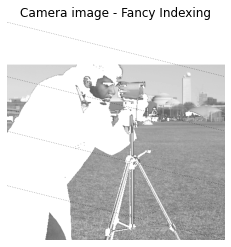

In [51]:
# Fancy Indexing 

inds_r = np.arange(len(camera))
# print(inds_r)

inds_c = 4 * inds_r % len(camera)
# print(inds_c)

# Masked 
camera[inds_r, inds_c] = 0

show_image(camera, 'Camera image - Fancy Indexing');

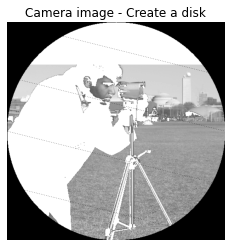

In [52]:
# Create a disk in the image for Image Manipulation 

nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]

cnt_row, cnt_col = nrows / 2, ncols / 2

outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >
                   (nrows / 2)**2)

camera[outer_disk_mask] = 0

show_image(camera, 'Camera image - Create a disk');

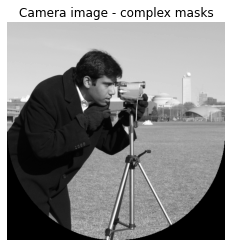

In [53]:
lower_half = row > cnt_row

lower_half_disk = np.logical_and(lower_half, outer_disk_mask)

camera = data.camera()

camera[lower_half_disk] = 0

show_image(camera, 'Camera image - complex masks');

### Color Images 

In [54]:
cat = data.chelsea()
type(cat)

cat.shape

(300, 451, 3)

In [55]:
cat[10, 20]

# Set the pixel at (50th row, 60th column) to "black"
cat[50, 60] = 0

# set the pixel at (50th row, 61st column) to "green"
cat[50, 61] = [0, 255, 0]  # [red, green, blue]

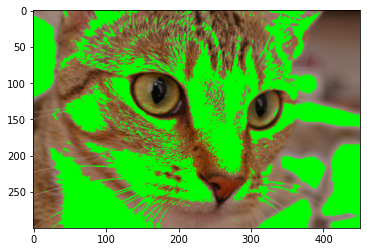

In [56]:
# 2D Mask for color image 

from skimage import data
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)

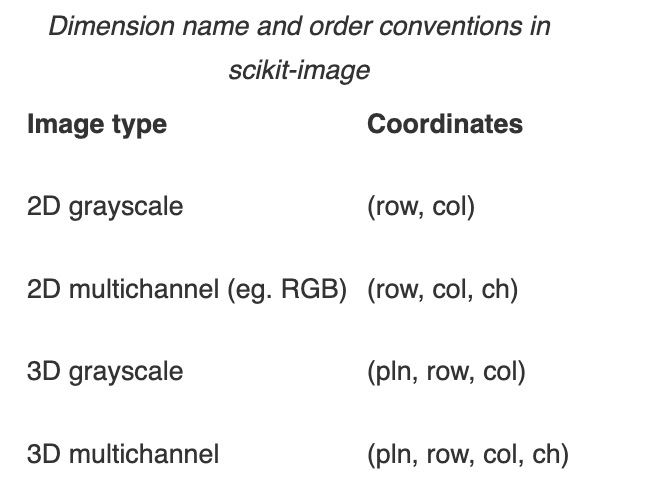

### 3D images

In [ ]:
# Many functions in scikit-image can operate on 3D images directly -  

rng = np.random.default_rng()
im3d = rng.random((100, 1000, 1000))

from skimage import morphology
from scipy import ndimage as ndi

seeds = ndi.label(im3d < 0.1)[0]

ws = morphology.watershed(im3d, seeds)

# plt.imshow(ws)

In [ ]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1], channel_axis=None)

In [ ]:
from skimage import filters

edges = np.empty_like(im3d)

for pln, image in enumerate(im3d):
    # Iterate over the leading dimension
    edges[pln] = filters.sobel(image)

### time dimension

Although scikit-image does not currently provide functions to work specifically with time-varying 3D data, its compatibility with NumPy arrays allows us to work quite naturally with a 5D array of the shape (t, pln, row, col, ch) - 

In [ ]:
'''
for timepoint in image5d:  
    # Each timepoint is a 3D multichannel image
    do_something_with(timepoint)

'''

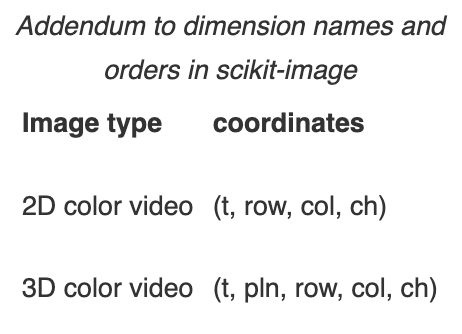

### Image Flipping 

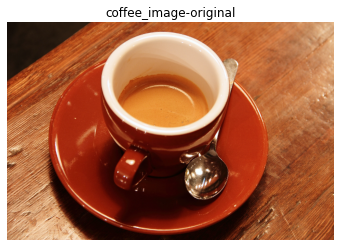

In [59]:
import numpy as np 
coffee_image = data.coffee()
show_image(coffee_image, 'coffee_image-original')

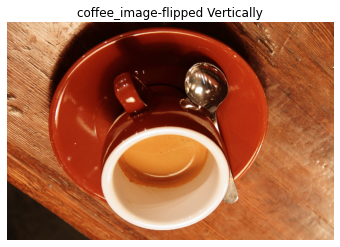

In [60]:
# Flip the image vertically
seville_vertical_flip = np.flipud(coffee_image)

# Show the resulting image
show_image(seville_vertical_flip, 'coffee_image-flipped Vertically')

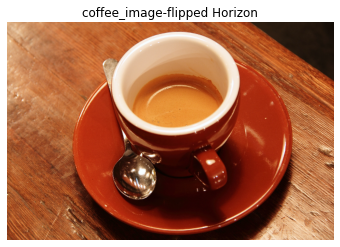

In [61]:
# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(coffee_image)

# Show the resulting image
show_image(seville_horizontal_flip, 'coffee_image-flipped Horizon')

### Histograms 

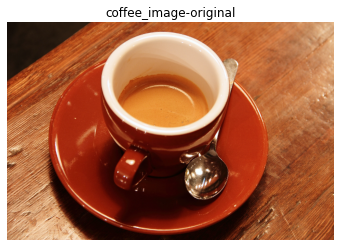

In [62]:
import numpy as np 
coffee_image = data.coffee()
show_image(coffee_image, 'coffee_image-original')

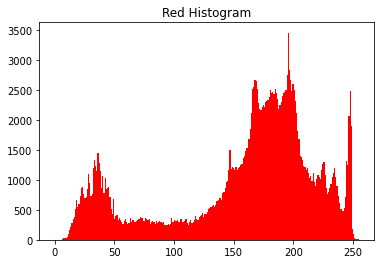

In [63]:
# Obtain the red channel
red_channel = coffee_image[:, :, 0]

'''
You will use hist() to display the 256 different intensities of the red color. 
And ravel() to make these color values an array of one flat dimension.
'''

# Plot the the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red');

# Set title
plt.title('Red Histogram');

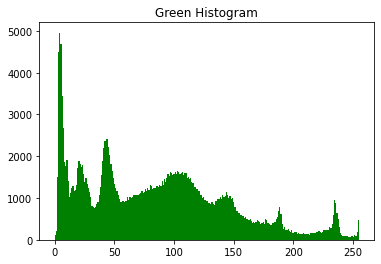

In [64]:
# Obtain the Green channel
red_channel = coffee_image[:, :, 1]

# Plot the the Green histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='green');

# Set title
plt.title('Green Histogram');

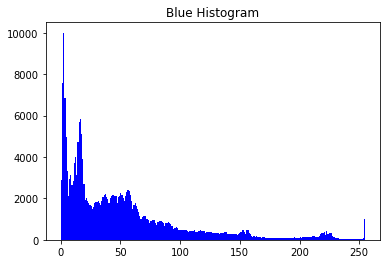

In [65]:
# Obtain the Blue channel
red_channel = coffee_image[:, :, 2]

# Plot the the Green histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='blue');

# Set title
plt.title('Blue Histogram');

### Thresholding

1. Partitioning an image into a foregraound and background
2. By making it black and white
3. Simplest method of image segmentation

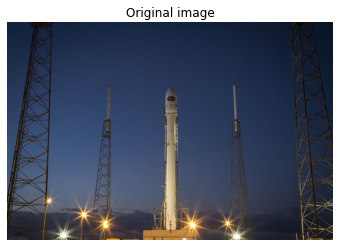

In [67]:
# Apply global thresholding to transform a photograph to binary - separate the foreground from the background.

from skimage.filters import threshold_otsu

rocket = data.rocket()

# Show the image
show_image(rocket, 'Original image')

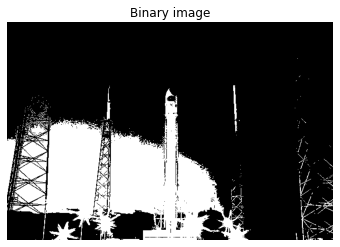

In [68]:
# Make the image grayscale using rgb2gray
rocket_image_gray = color.rgb2gray(rocket)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(rocket_image_gray)

# Apply thresholding to the image
binary = rocket_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

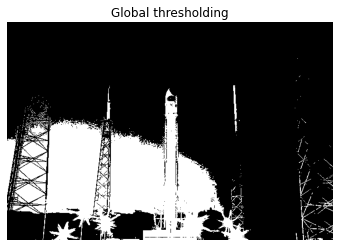

In [69]:
# Make the image grayscale using rgb2gray
page_image = color.rgb2gray(rocket)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

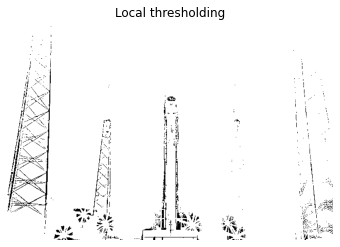

In [70]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

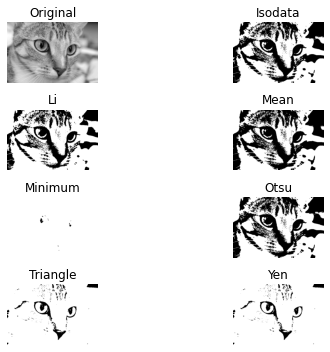

In [71]:
from skimage.filters import try_all_threshold

cat_image = data.chelsea()
 
# Turn RGB to grayscale
grayscale = color.rgb2gray(cat_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);

### Image Transformation 
#### Rescale, Resize 

(300, 451, 3)


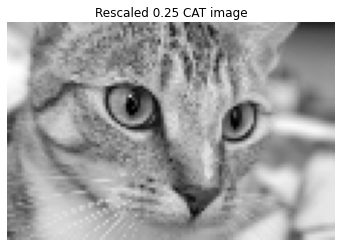

In [83]:
img = data.chelsea()

print(img.shape)

# Turn RGB to grayscale
grayscale = color.rgb2gray(img)

# While rescaling image gaussian smoothing can performed to avoid anti aliasing artifacts.
img_rescaled = rescale(grayscale, 1.0 / 4.0, anti_aliasing=False)  

#Check rescales image size in variable explorer
show_image(img_rescaled, 'Rescaled 0.25 CAT image')

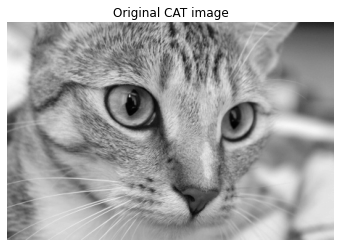

In [76]:
#Check Original
show_image(grayscale, 'Original CAT image')

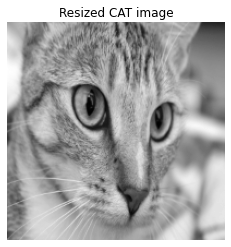

In [77]:
#Resize, resize image to given dimensions (shape)
img_resized = resize(grayscale, (200, 200),anti_aliasing=True)

#Check 
show_image(img_resized, 'Resized CAT image')

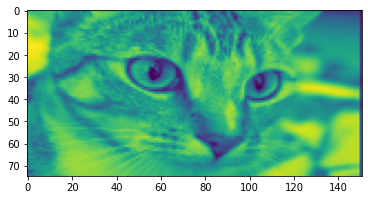

In [81]:
#Downscale, downsample using local mean of elements of each block defined by user
img_downscaled = downscale_local_mean(grayscale, (4, 3))
plt.imshow(img_downscaled)

### Filter - Gausian and Sobel 

In [84]:
#A quick look at a few skimage functions
from skimage import io
from skimage.filters import gaussian, sobel

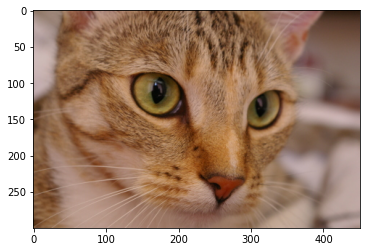

In [85]:
img = data.chelsea()
plt.imshow(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


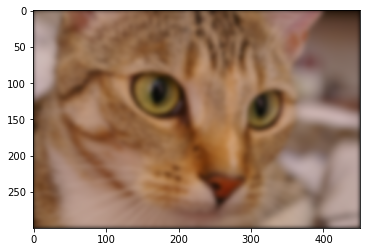

In [89]:
gaussian_using_skimage = gaussian(img, sigma=3, mode='constant', cval=0.0)
plt.imshow(gaussian_using_skimage)

(300, 451, 3)


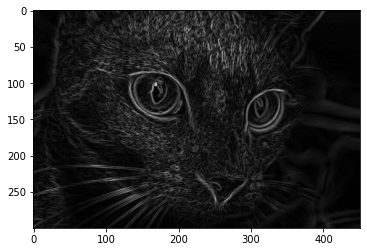

In [90]:
img = data.chelsea()

print(img.shape)

# Turn RGB to grayscale
grayscale = color.rgb2gray(img)

sobel_img = sobel(grayscale)  #Works only on 2D (gray) images
plt.imshow(sobel_img, cmap='gray')